# Week10 - Lab

* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [2]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LogisticRegression(solver='liblinear'))
             ])

params = {'model__C': [0.01, 10, 100], 'pca__n_components': [2,10,25]}

mnist_search = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
mnist_search = mnist_search.fit(X_train, y_train)

mnist_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=25)),
                ('model', LogisticRegression(C=10, solver='liblinear'))])

In [7]:
print(f'Validation score: {mnist_search.best_score_:.2%}')
print(f'Test score: {mnist_search.score(X_test, y_test):.2%}')

Validation score: 97.14%
Test score: 95.61%


In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.keys()
samples = 2500

mnist_sample = mnist.data.sample(2500)
mnist_sample_targets = mnist.target.iloc[mnist_sample.index.tolist()]

Completed in 0:00:05.661391


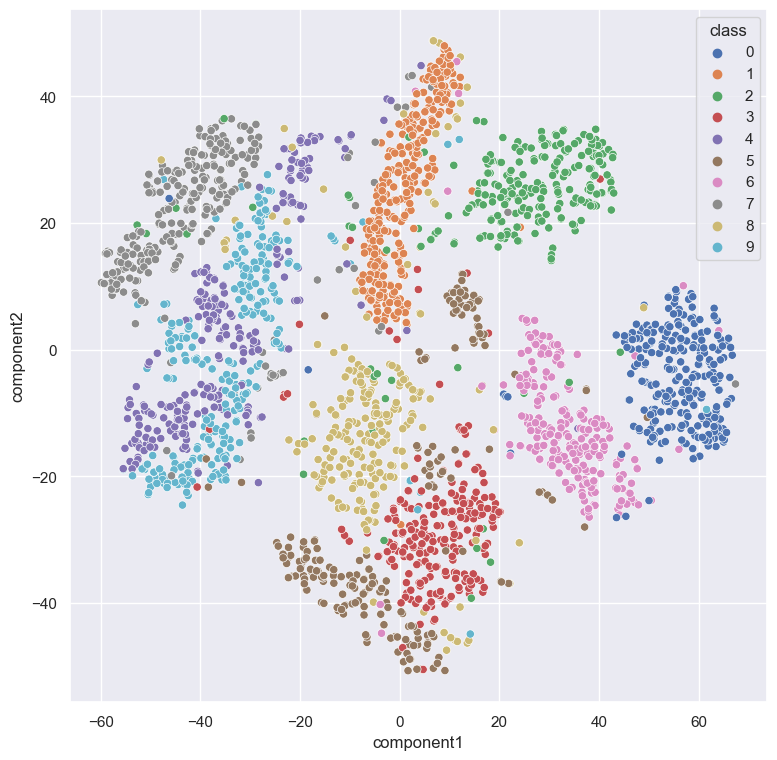

In [14]:
from sklearn.manifold import TSNE
import datetime
import pandas as pd
import matplotlib.pyplot as plt


ts_start = datetime.datetime.now()
tsne_model = TSNE(n_components=2, 
            init='random', 
            learning_rate='auto', 
            perplexity=30)

tsne = tsne_model.fit_transform(mnist_sample)

ts_end = datetime.datetime.now()

print(f'Completed in {ts_end-ts_start}')

tsne_df = pd.DataFrame(tsne)
tsne_df.index = mnist_sample.index.tolist()
tsne_df.columns = ['component1', 'component2']

tsne_df = pd.concat([tsne_df, mnist_sample_targets], axis=1)

import seaborn as sns

sns.set(rc={'figure.figsize':(9,9)})
sns.scatterplot(x='component1', y='component2', hue='class', data=tsne_df)
plt.show()

- The t-SNE plot shows that there is some degree of separation between the 9 classes in the dataset
- But there is some overlap and outliers that suggest the classes are not completely distinct from each other.
- This may indicate that there is some ambiguity in the underlying features that distinguish the different classes.